## Eigenface for recognition

###### We will use library called opencv for work with image dataset thats why we have installed it

In [ ]:
!pip install opencv-python

###### Here we are importing required libraries (tools) for further work

>1. __zipfile__ - using this library we will access to our dataset which is in zip file called archive.zip
2. __cv2__ - OpenCV packages for Python
3. __numpy__ - NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
4. __pyplot__ - Pyplot is a Matplotlib module which provides a MATLAB-like interface.
5. __PCA__ - Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
6. __random__ - This module implements pseudo-random number generators for various distributions.

In [1]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as rd

In [2]:
faces = {}
with zipfile.ZipFile("archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.startswith("__MACOSX"):
            if not filename.endswith(".pgm"):
                continue 
            with facezip.open(filename) as image:
                faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
        else:
            continue

In [3]:
faces['archive/s34/7.pgm']

array([[ 19,  23,  20, ...,  17,  16,  15],
       [ 22,  22,  19, ...,  17,  18,  18],
       [ 22,  24,  18, ...,  18,  17,  17],
       ...,
       [169, 160, 157, ..., 156, 167, 177],
       [169, 158, 154, ..., 164, 171, 176],
       [168, 160, 154, ..., 169, 173, 175]], dtype=uint8)

Random faces from our dataset


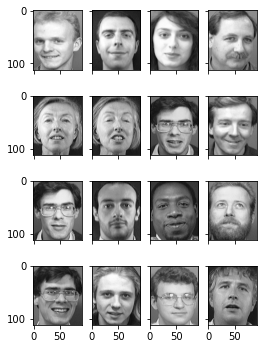

In [4]:
faces_vals = list(faces.values())
rd.shuffle(faces_vals)
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(4,6))
faceimages = faces_vals[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Random faces from our dataset")
plt.show()

In [5]:
facesize = list(faces.values())[0].shape
print("Image size:", facesize)

Image size: (112, 92)


In [6]:
classes = set(filename.split("/")[1] for filename in faces.keys())
print("Num of subjects(classes):", len(classes))
print("Num of images:", len(faces))

Num of subjects(classes): 40
Num of images: 400


In [7]:
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("archive/s3/"):
        continue # this is our test set
    if key == "archive/s25/3.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[1])
 
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

In [8]:
faceMatrix = np.array(facematrix)

In [9]:
pca = PCA().fit(faceMatrix)

In [14]:
n_components = 40
eigenfaces = pca.components_[:n_components]

Eigenfaces


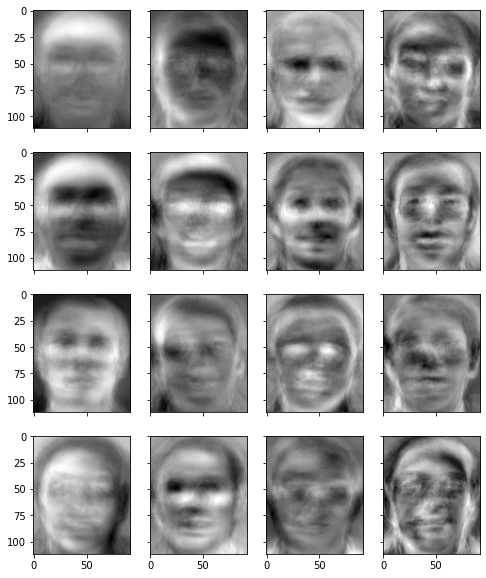

In [15]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(facesize), cmap="gray")
print("Eigenfaces")
plt.show()

In [16]:
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Weight matrix:", weights.shape)

Weight matrix: (40, 389)


In [17]:
query = faces["archive/s25/3.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Matching %s: Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))


Matching s25: Euclidean distance 1044.745420


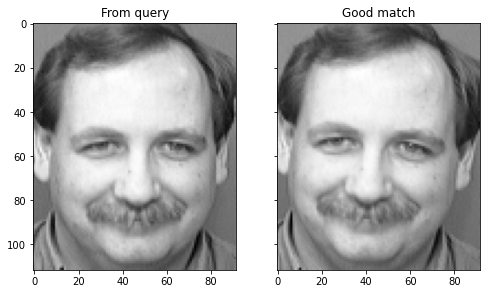

In [18]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(facesize), cmap="gray")
axes[0].set_title("From query")
axes[1].imshow(facematrix[best_match].reshape(facesize), cmap="gray")
axes[1].set_title("Good match")
plt.show()

In [19]:
query = faces["archive/s3/2.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Match %s: Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))


Match s26: Euclidean distance 2622.527232


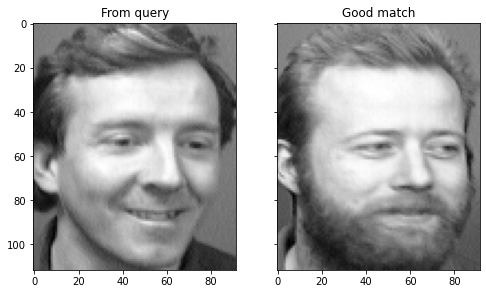

In [20]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(facesize), cmap="gray")
axes[0].set_title("From query")
axes[1].imshow(facematrix[best_match].reshape(facesize), cmap="gray")
axes[1].set_title("Good match")
plt.show()

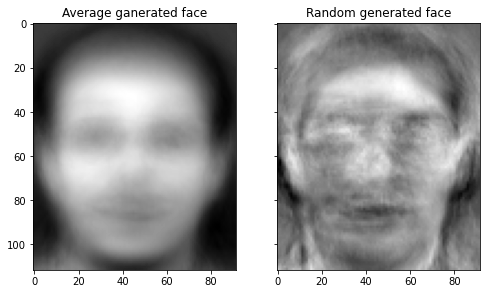

In [21]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(pca.mean_.reshape(facesize), cmap="gray")
axes[0].set_title("Average ganerated face")
random_weights = np.random.randn(n_components) * weights.std()
newface = random_weights @ eigenfaces + pca.mean_
axes[1].imshow(newface.reshape(facesize), cmap="gray")
axes[1].set_title("Random generated face")
plt.show()